# results

In [1]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd
from _tools import load,save,checkdir
%matplotlib inline
from  matplotlib import rc
from matplotlib.colors import LogNorm
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import copy

## kinematics

/Users/patrickbarry/opt/anaconda2/envs/fitpack/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.95,-0.03,'$x_{\\pi}$')

/Users/patrickbarry/opt/anaconda2/envs/fitpack/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


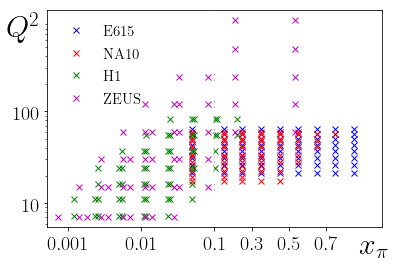

In [2]:
fig = py.figure(figsize=(6,4))
ax1=py.subplot(121)
ax2=py.subplot(122)

data=load('%s/%s'%('data/cov-exp/calc','data_and_thy.dat'))
NA10=data['dy-pion']['tabs']['NA10']
E615=data['dy-pion']['tabs']['E615']
H1=data['ln']['tabs']['H1']
ZEUS=data['ln']['tabs']['ZEUS']

ax1.plot(E615['xF'],E615['Q2'],'bx',label=r'$\rm E615$')
ax1.plot(NA10['xF'],NA10['Q2'],'rx',label=r'$\rm NA10$')
ax1.plot(H1['xpi'],H1['Q2'],'gx',label=r'$\rm H1$')
ax1.plot(ZEUS['xpi'],ZEUS['Q2'],'mx',label=r'$\rm ZEUS$')
ax1.semilogy()
ax1.semilogx()
ax1.set_xlim(None,0.1)
ax1.spines['right'].set_visible(False)
ax1.legend(loc=2,fontsize=15,frameon=0)

ax2.plot(E615['xF'],E615['Q2'],'bx',label=r'$\rm E615$')
ax2.plot(NA10['xF'],NA10['Q2'],'rx',label=r'$\rm NA10$')
ax2.plot(H1['xpi'],H1['Q2'],'gx',label=r'$\rm H1$')
ax2.plot(ZEUS['xpi'],ZEUS['Q2'],'mx',label=r'$\rm ZEUS$')
ax2.semilogy()
ax2.set_xlim(0.1,1)
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.tick_params(axis='y',which='both',left='off')
ax2.spines['left'].set_visible(False)
py.subplots_adjust(wspace=0, hspace=0)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_yticks([10,100])
ax1.set_yticklabels([r'$10$',r'$100$'])
ax1.yaxis.set_label_coords(-0.14,0.85)
ax1.set_ylabel(r'$Q^2$',size=30,rotation=0)
ax1.set_xticks([0.001,0.01,0.1])
ax1.set_xticklabels([r'$0.001$',r'$0.01$',r'$0.1$'])


ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.xaxis.set_label_coords(0.95, -0.03)
ax2.set_xticks([0.3,0.5,0.7])
ax2.set_xticklabels([r'$0.3$',r'$0.5$',r'$0.7$',r'$0.9$'])
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_xlabel(r'$x_{\pi}$',size=30)


## Data vs Theory

## chi2 comparison with models

In [4]:
#data['cov-exp+e866']

In [5]:
names=[]
names.append('cov-mon')
names.append('cov-exp')
names.append('bishari')
names.append('imf-exp')
names.append('kT2-cutoff')
names.append('pv')
names.append('regge')

names.append('cov-mon+e866')
names.append('cov-exp+e866')
names.append('bishari+e866')
names.append('imf-exp+e866')
names.append('kT2-cutoff+e866')
names.append('pv+e866')
names.append('regge+e866')

data={}
for name in names: data[name]=load('data/%s/calc/%s'%(name,'data_and_thy.dat'))

table={}
for name in data:
    table[name]={'col':[],'npts':[],'chi2':[]}
    for kk in data[name]:
        for l in data[name][kk]['summary']: 
            line=l.split()
            if len(line)==9 and line[0]!='idx':
                col=line[2]
                npts=int(line[3])
                chi2=float(line[4])
                table[name]['col'].append(col)
                table[name]['npts'].append(npts)
                table[name]['chi2'].append(chi2)
            if '+e866' not in name: continue
            if len(line)==8 and line[0]!='idx':
                col=line[2]
                npts=int(line[2])
                chi2=float(line[3])
                table[name]['col'].append(col)
                table[name]['npts'].append(npts)
                table[name]['chi2'].append(chi2)
                
                
table2={'col':[],'chi2':[],'npts':[],'chi2/npts':[]}
for k in table:
    table[k]=pd.DataFrame(table[k])
    table2['col'].append(k)
    table2['chi2'].append(table[k].chi2.sum())
    table2['npts'].append(table[k].npts.sum())
    table2['chi2/npts'].append(table[k].chi2.sum()/table[k].npts.sum())

pd.DataFrame(table2)[['col','npts','chi2','chi2/npts']].sort_values('chi2')

,col,npts,chi2,chi2/npts
11,imf-exp,250,244.79,0.979160
13,regge,250,262.79,1.051160
3,cov-mon,250,265.95,1.063800
6,cov-exp,250,267.66,1.070640
8,imf-exp+e866,265,272.40,1.027925
1,bishari,250,272.45,1.089800
2,pv,250,273.76,1.095040
5,regge+e866,265,293.48,1.107472
7,kT2-cutoff,250,295.40,1.181600
10,cov-mon+e866,265,297.93,1.124264


In [6]:
for k in data:
    if 'e866' in k: continue
    print '\n',k,'\n'
    for kk in data[k]:
        for l in data[k][kk]['summary']:
            if 'filters' in l: continue
            print l
           
        
for k in data:
    if 'e866' not in k: continue
    print '\n',k,'\n'
    for kk in data[k]:
        for l in data[k][kk]['summary']:
            if 'filters' in l: continue
            print l


kT2-cutoff 

reaction: ln
    idx        tar        col  npts       chi2  chi2-npts  chi2/npts      rchi2      nchi2
   1000          p         H1    58      29.54     -28.46       0.51       0.00      16.14
   2000          p       ZEUS    50      94.93      44.93       1.90       0.86       0.58
reaction: dy-pion
    idx        tar        col  npts       chi2  chi2-npts  chi2/npts      rchi2      nchi2
  10001          W       E615    72      82.51      10.51       1.15       0.00       0.21
  10002          W       NA10    44      47.92       3.92       1.09       0.00       4.95
  10003          W       NA10    26      40.50      14.50       1.56       0.00       3.73

pv 

reaction: ln
    idx        tar        col  npts       chi2  chi2-npts  chi2/npts      rchi2      nchi2
   1000          p         H1    58      58.45       0.45       1.01       0.00      16.14
   2000          p       ZEUS    50      62.94      12.94       1.26       9.03       0.58
reaction: dy-pion
    idx 

## data and theory plots

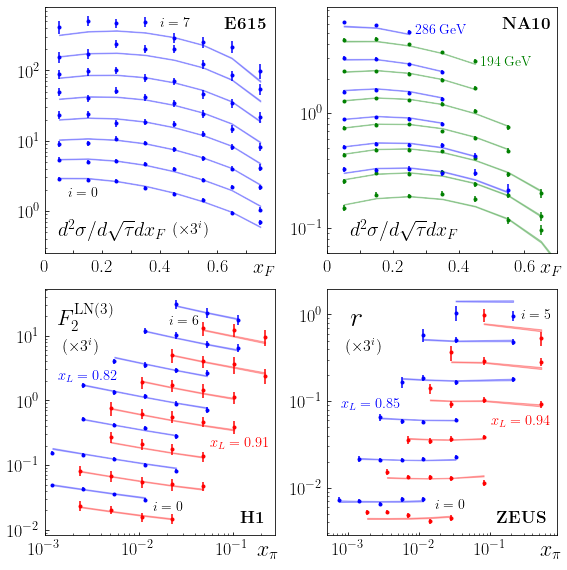

In [7]:
nrows,ncols=2,2
fig = py.figure(figsize=(ncols*4,nrows*4))

data=load('data/%s/calc/%s'%('imf-exp','data_and_thy.dat'))


ax1=py.subplot(nrows,ncols,1)            
E615=pd.DataFrame(data['dy-pion']['tabs']['E615'])
Q2bins=[]
Q2bins.append([20,23])
Q2bins.append([23,28])
Q2bins.append([28,35])
Q2bins.append([35,40])
Q2bins.append([40,45])
Q2bins.append([45,55])
Q2bins.append([55,60])
Q2bins.append([60,65])

for i in range(len(Q2bins)):
    d=E615.query('Q2>%f and Q2<%f'%(Q2bins[i][0],Q2bins[i][1]))
    if len(d['Q2'])!=0:
        ax1.errorbar(d['xF'][:-1],(d['exp']*3**i)[:-1],(d['alpha']*3**i)[:-1],fmt='b.')
        ii=np.argsort(d['xF'].values)
        X=d['xF'].values[ii]
        Y=d['thy'].values[ii]
        YP=Y+d['dthy'].values[ii]
        YM=Y-d['dthy'].values[ii]
        if len(d['xF'].values)>1:ax1.fill_between(X[:-1],(YM*3**i)[:-1],(YP*3**i)[:-1],color='b',alpha=0.3)

            
ax2=py.subplot(nrows,ncols,2)            
NA10=pd.DataFrame(data['dy-pion']['tabs']['NA10']).query('idx==10002')
Q2bins=[]
Q2bins.append([15,18])
Q2bins.append([18,20])
Q2bins.append([20,23])
Q2bins.append([23,26])
Q2bins.append([26,30])
Q2bins.append([30,33])
Q2bins.append([33,35])
Q2bins.append([35,40.8])#
Q2bins.append([40.8,43])#
Q2bins.append([43,49])
Q2bins.append([49,52])
Q2bins.append([52,58])
Q2bins.append([58,65])
for i in range(len(Q2bins)):
    d=NA10.query('Q2>%f and Q2<%f'%(Q2bins[i][0],Q2bins[i][1]))
    if len(d['Q2'])!=0:
        ax2.errorbar(d['xF'],d['exp'],d['alpha'],fmt='g.')
        ii=np.argsort(d['xF'].values)
        X=d['xF'].values[ii]
        Y=d['thy'].values[ii]
        YP=Y+d['dthy'].values[ii]
        YM=Y-d['dthy'].values[ii]
        if len(d['xF'].values)>1:ax2.fill_between(X,YM,YP,color='g',alpha=0.3)

NA10=pd.DataFrame(data['dy-pion']['tabs']['NA10']).query('idx==10003')
for i in range(len(Q2bins)):
    d=NA10.query('Q2>%f and Q2<%f'%(Q2bins[i][0],Q2bins[i][1]))
    if len(d['Q2'])!=0:
        ax2.errorbar(d['xF'],d['exp'],d['alpha'],fmt='b.')
        ii=np.argsort(d['xF'].values)
        X=d['xF'].values[ii]
        Y=d['thy'].values[ii]
        YP=Y+d['dthy'].values[ii]
        YM=Y-d['dthy'].values[ii]
        if len(d['xF'].values)>1:ax2.fill_between(X,YM,YP,color='b',alpha=0.3)
            

H1=data['ln']['tabs']['H1']
ZEUS=data['ln']['tabs']['ZEUS']
H1['rQ2']=np.around(H1['Q2'],decimals=1)
ZEUS['rQ2']=np.around(ZEUS['Q2'],decimals=1)
H1['ry']=np.around(H1['y'],decimals=1)
ZEUS['ry']=np.around(ZEUS['y'],decimals=1)
H1=pd.DataFrame(H1)
ZEUS=pd.DataFrame(ZEUS)

ax3=py.subplot(nrows,ncols,3)            
Q2=sorted(set(H1['rQ2']))
for i in range(len(Q2)):
    d=H1.query('rQ2==%f'%Q2[i])
    y=sorted(set(H1['ry']))
    for ii in range(len(y)):
        dd=d.query('ry==%f'%y[ii])
        if ii==0: c='r'
        if ii==1: c='b'
        ax3.errorbar(dd['xpi'],dd['exp']*3**i,dd['alpha']*3**i,fmt='%s.'%c,label='y=%0.1f'%y[ii])
        iii=np.argsort(dd['xpi'].values)
        X=dd['xpi'].values[iii]
        Y=dd['thy'].values[iii]
        YP=dd['thy'].values[iii]+dd['dthy'].values[iii]
        YM=dd['thy'].values[iii]-dd['dthy'].values[iii]
        if len(dd['xpi'].values)>1:
            ax3.fill_between(X,YM*3**i,YP*3**i,color=c,alpha=0.3)
            #ax.plot(X,Y,'%s-.'%c)
        else: 
            ax3.plot(X,Y,'%sx'%c)

            
ax4=py.subplot(nrows,ncols,4)            
Q2=sorted(set(ZEUS['rQ2']))
for i in range(len(Q2)):
    d=ZEUS.query('rQ2==%f'%Q2[i])
    y=sorted(set(ZEUS['ry']))
    for ii in range(len(y)):
        dd=d.query('ry==%f'%y[ii])
        if len(dd.xpi)==1: continue
        if ii==0: c='r'
        if ii==1: c='b'
        ax4.errorbar(dd['xpi'],dd['exp']*3**i,dd['alpha']*3**i,fmt='%s.'%c,label='y=%0.1f'%y[ii])
        iii=np.argsort(dd['xpi'].values)
        X=dd['xpi'].values[iii]
        Y=dd['thy'].values[iii]
        YP=dd['thy'].values[iii]+dd['dthy'].values[iii]
        YM=dd['thy'].values[iii]-dd['dthy'].values[iii]
        if len(dd['xpi'].values)>1:
            ax4.fill_between(X,YM*3**i,YP*3**i,color=c,alpha=0.3)
            #ax.plot(X,Y,'%s-.'%c)
        else: 
            ax4.plot(X,Y*3**i,'%sx'%c)

ax1.semilogy()
ax2.semilogy()
ax3.semilogx()
ax3.semilogy()
ax4.semilogx()
ax4.semilogy()

ax1.tick_params(axis='both',which='both',direction='in',pad=4,labelsize=18)
ax1.set_xlim(0,0.8)
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
ax1.set_xticklabels([r'$0$',r'',r'$0.2$',r'',r'$0.4$',r'',r'$0.6$',r'',r''])
ax1.set_xlabel(r'$x_F$',size=20)
ax1.xaxis.set_label_coords(0.95,-0.03)
ax1.set_ylim(2.5e-1,8e2)
ax1.text(0.06,0.06,r'$d^2\sigma/d\sqrt{\tau}dx_F$',transform=ax1.transAxes,size=20)
ax1.text(0.56,0.08,r'$(\times 3^i)$',transform=ax1.transAxes,size=16)
ax1.text(0.1,0.23,r'$i=0$',transform=ax1.transAxes,size=14)
ax1.text(0.5,0.92,r'$i=7$',transform=ax1.transAxes,size=14)
ax1.text(0.78,0.91,r'$\bf E615$',transform=ax1.transAxes,size=17)

ax2.tick_params(axis='both',which='both',direction='in',pad=4,labelsize=18)
ax2.set_xlim(0,0.7)
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax2.set_xticklabels([r'$0$',r'',r'$0.2$',r'',r'$0.4$',r'',r'$0.6$',r''])
ax2.set_xlabel(r'$x_F$',size=20)
ax2.xaxis.set_label_coords(0.97,-0.03)
ax2.set_ylim(0.06,None)
ax2.text(0.1,0.06,r'$d^2\sigma/d\sqrt{\tau}dx_F$',transform=ax2.transAxes,size=20)
ax2.text(0.76,0.91,r'$\bf NA10$',transform=ax2.transAxes,size=17)
ax2.text(0.38,0.89,r'$286~\rm GeV$',color='b',transform=ax2.transAxes,size=14)
ax2.text(0.67,0.76,r'$194~\rm GeV$',color='g',transform=ax2.transAxes,size=14)

ax3.tick_params(axis='both',which='both',direction='in',pad=5,labelsize=18)
ax3.set_xlim(1e-3,2.8e-1)
ax3.set_xlabel(r'$x_{\pi}$',size=22)
ax3.xaxis.set_label_coords(0.97,-0.03)
#ax3.set_ylim(4e-1,8e1)
ax3.text(0.06,0.83,r'$F_2^{\rm LN(3)}$',transform=ax3.transAxes,size=22)
ax3.text(0.08,0.75,r'$(\times 3^i)$',transform=ax3.transAxes,size=16)
ax3.text(0.47,0.10,r'$i=0$',transform=ax3.transAxes,size=14)
ax3.text(0.54,0.855,r'$i=6$',transform=ax3.transAxes,size=14)
ax3.text(0.72,0.350,r'$x_L=0.91$',color='r',transform=ax3.transAxes,size=14.5)
ax3.text(0.06,0.625,r'$x_L=0.82$',color='b',transform=ax3.transAxes,size=14.5)
ax3.text(0.85,0.05,r'$\bf H1$',transform=ax3.transAxes,size=17)

ax4.tick_params(axis='both',which='both',direction='in',pad=5,labelsize=18)
ax4.set_xlim(5e-4,0.9)
ax4.set_xlabel(r'$x_{\pi}$',size=22)
ax4.xaxis.set_label_coords(0.97,-0.03)
ax4.text(0.1,0.85,r'$r$',transform=ax4.transAxes,size=28)
ax4.text(0.08,0.75,r'$(\times 3^i)$',transform=ax4.transAxes,size=16)
ax4.text(0.47,0.11,r'$i=0$',transform=ax4.transAxes,size=14)
ax4.text(0.84,0.88,r'$i=5$',transform=ax4.transAxes,size=14)
ax4.text(0.71,0.44,r'$x_L=0.94$',color='r',transform=ax4.transAxes,size=14.5)
ax4.text(0.06,0.51,r'$x_L=0.85$',color='b',transform=ax4.transAxes,size=14.5)
ax4.text(0.74,0.05,r'$\bf ZEUS$',transform=ax4.transAxes,size=17)

py.tight_layout()
#py.subplots_adjust(wspace=None, hspace=0.05)
py.savefig('dvt.png')

## Lambdas

In [8]:
names=[]
names.append('cov-mon')
names.append('cov-exp')
names.append('imf-exp')
names.append('kT2-cutoff')
names.append('pv')
names.append('regge')

names.append('cov-mon+e866')
names.append('cov-exp+e866')
names.append('imf-exp+e866')
names.append('kT2-cutoff+e866')
names.append('pv+e866')
names.append('regge+e866')

for name in names: 
    data=load('data/%s/calc/%s'%(name,'lambda.dat'))
    mean=data['mean']
    std=data['std']
    print '%20s lambda=%6.2f +/- %5.2f'%(name,mean,std)
    

             cov-mon lambda=  0.52 +/-  0.02
             cov-exp lambda=  0.58 +/-  0.02
             imf-exp lambda=  1.31 +/-  0.04
          kT2-cutoff lambda=  0.35 +/-  0.02
                  pv lambda=  0.25 +/-  0.01
               regge lambda=  0.78 +/-  0.05
        cov-mon+e866 lambda=  0.68 +/-  0.02
        cov-exp+e866 lambda=  0.87 +/-  0.02
        imf-exp+e866 lambda=  1.35 +/-  0.02
     kT2-cutoff+e866 lambda=  0.29 +/-  0.01
             pv+e866 lambda=  0.27 +/-  0.01
          regge+e866 lambda=  1.43 +/-  0.07


## PDF

In [9]:
names=['no-hera','imf-exp','regge','cov-exp','cov-mon','bishari','pv','kT2-cutoff']
data={}
for name in names: 
    data[name]=load('data/%s/calc/%s'%(name,'pdf2.dat'))
    if name=='no-hera': continue
    name+='+e866'
    data[name]=load('data/%s/calc/%s'%(name,'pdf2.dat'))

In [10]:
def plot_line(ax,data,Q2,flav,label,color,ls,alpha=1,f=1):
    ax.plot(data['X'],f*data['Q2'][Q2][flav]['f0'],label=label,c=color,ls=ls,alpha=alpha,lw=1)

def plot_MC(ax,data,Q2,flav,label,color,ls,alpha,f=1):
    for i in range(20):#range(len(data['Q2'][Q2][flav])):
        ax.plot(data['X'],f*data['Q2'][Q2][flav][i],label=label,c=color,ls=ls,alpha=alpha)

def plot_band(ax,data,Q2,flav,c,alpha=1,f=1):
    ymin=data['Q2'][Q2][flav]['f0']-data['Q2'][Q2][flav]['dfmin']
    ymax=data['Q2'][Q2][flav]['f0']+data['Q2'][Q2][flav]['dfmax']
    return ax.fill_between(data['X'],f*ymin,f*ymax,color=c,alpha=alpha)
    
def plot_band2(ax,data,Q2,flav,c,alpha=0.1,f=1):
    ymin=data['Q2'][Q2][flav]['f0']-data['Q2'][Q2][flav]['dfmin']
    ymax=data['Q2'][Q2][flav]['f0']+data['Q2'][Q2][flav]['dfmax']
#    return ax.fill_between(data['X'],f*ymin,f*ymax,alpha=alpha,hatch='...',facecolor='none',edgecolor=c)
    return ax.fill_between(data['X'],f*ymin,f*ymax,alpha=alpha,facecolor=c,edgecolor=c)

def plot_band3(ax,data,Q2,flav,c,mod,hatch,edgec,alpha=1,f=1):
    names=['pv','cov-mon','regge','cov-exp','imf-exp']
    MIN,MAX=[],[]
    for name in names:
        name+=mod
        ymin=data[name]['Q2'][Q2][flav]['f0']-data[name]['Q2'][Q2][flav]['dfmin']
        ymax=data[name]['Q2'][Q2][flav]['f0']+data[name]['Q2'][Q2][flav]['dfmax']
        MIN.append(ymin)
        MAX.append(ymax)
    MAX=np.amax(MAX,axis=0)
    MIN=np.amin(MIN,axis=0)
#    return ax.fill_between(data[name]['X'],f*MIN,f*MAX,alpha=alpha,hatch=hatch,facecolor='none',edgecolor=c)
    return ax.fill_between(data[name]['X'],f*MIN,f*MAX,alpha=alpha,hatch=hatch,facecolor=c,edgecolor=edgec)

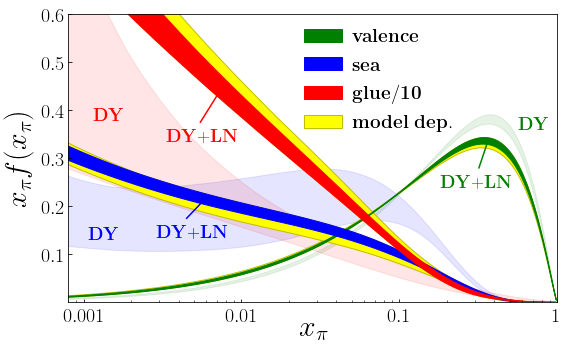

In [11]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*8,nrows*5))
py.subplots_adjust(wspace=0, hspace=0.05)
red='r'   #'#ff8080'
blue='b'  #'#80aaff'
green='g' #'#00cc00'
Q2=10

ax=py.subplot(nrows,ncols,1)
plot_band2(ax,data['no-hera'],Q2,'ubv',green)
plot_band2(ax,data['no-hera'],Q2,'u',blue)
plot_band2(ax,data['no-hera'],Q2,'g',red,f=0.1)

b4=plot_band3(ax,data,Q2,'ubv','yellow','','','y')
plot_band3(ax,data,Q2,'u','yellow','','','y')
plot_band3(ax,data,Q2,'g','yellow','','','y',f=0.1)

b1=plot_band(ax,data['imf-exp'],Q2,'ubv',green)
b2=plot_band(ax,data['imf-exp'],Q2,'u',blue)
b3=plot_band(ax,data['imf-exp'],Q2,'g',red,f=0.1)

ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.semilogx()
ax.set_xlim(8e-4,1)
ax.set_xticks([1e-3,1e-2,1e-1,1])
ax.set_xticklabels([r'$0.001$',r'$0.01$',r'$0.1$',r'$1$'])
ax.set_xlabel(r'$x_{\pi}$',size=30)
ax.xaxis.set_label_coords(0.5,-0.05)
ax.set_yticks([0.1,0.2,0.3,0.4,0.5])
ax.set_ylim(0,0.6)
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_ylabel(r'$x_{\pi}f(x_{\pi})$',size=30)
ax.text(0.92,0.6,r'$\bf DY$',color='g',transform=ax.transAxes,size=18)
ax.text(0.76,0.4,r'$\bf DY$'+r'$\bf +$'+r'$\bf LN$',color='g',transform=ax.transAxes,size=18)
ax.plot((0.32, 0.36), (0.28, 0.33), 'g-')
ax.text(0.04,0.22,r'$\bf DY$',color='b',transform=ax.transAxes,size=18)
ax.text(0.18,0.225,r'$\bf DY$'+r'$\bf +$'+r'$\bf LN$',color='b',transform=ax.transAxes,size=18)
ax.plot((0.0045, 0.0055), (0.175, 0.205), 'b-')
ax.text(0.05,0.63,r'$\bf DY$',color='r',transform=ax.transAxes,size=18)
ax.text(0.2,0.56,r'$\bf DY$'+r'$\bf +$'+r'$\bf LN$',color='r',transform=ax.transAxes,size=18)
ax.plot((0.0055, 0.007), (0.375, 0.43), 'r-')
ax.legend([(b1),(b2),(b3),(b4)],[r'$\bf valence$',r'$\bf sea$',r'$\bf glue/10$',r'$\bf model\ dep.$'],loc=0,handletextpad=0.5,fontsize=19,bbox_to_anchor=(0.82,1.015),frameon=0)

py.tight_layout()
py.savefig('pion-pdfs.png')

## db-ub

In [11]:
names=[]
names.append('cov-mon+e866')
names.append('cov-exp+e866')
names.append('imf-exp+e866')
names.append('pv+e866')
names.append('regge+e866')

exp=load('data/%s/calc/%s'%('imf-exp+e866','data_and_thy.dat'))

data={}
for name in names:
    data[name]=load('data/%s/calc/%s'%(name,'dbub2.dat'))

In [12]:
data['cov-exp+e866'][54.0].keys()

['f0', 'dfmin', 'dfmax']

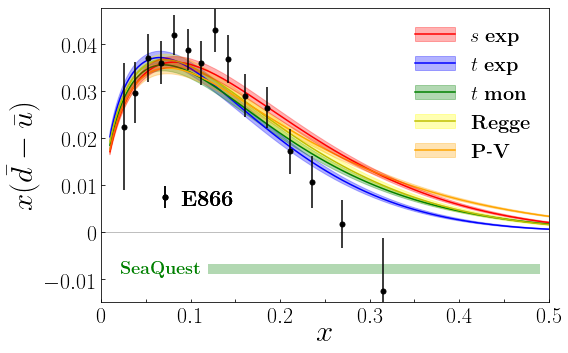

In [13]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*8,nrows*5))
ax=py.subplot(nrows,ncols,1)
lmap={}
lmap['imf-exp+e866']=r'$\boldmath{s}~{\bf exp}$'
lmap['regge+e866']=r'$\bf Regge$'
lmap['cov-exp+e866']=r'$\boldmath{t}~{\bf exp}$'
lmap['cov-mon+e866']=r'$\boldmath{t}~{\bf mon}$'
lmap['pv+e866']=r'$\bf P$'+r'-'+r'$\bf V$'

Q2=54.0
hmap={}

k='imf-exp+e866'
X=data[k]['X']    
d=data[k][54.0]
p,=ax.plot(X,X*d['f0'],label=lmap[k],color='r')
b=ax.fill_between(X,X*(d['f0']-d['dfmin']),X*(d['f0']+d['dfmax']),alpha=0.3,color='r',zorder=8)
hmap[k]=(b,p)

k='cov-exp+e866'
X=data[k]['X']    
d=data[k][54.0]
p,=ax.plot(X,X*d['f0'],label=lmap[k],color='b')
b=ax.fill_between(X,X*(d['f0']-d['dfmin']),X*(d['f0']+d['dfmax']),alpha=0.3,color='b')
hmap[k]=(b,p)

k='cov-mon+e866'
X=data[k]['X']    
d=data[k][54.0]
p,=ax.plot(X,X*d['f0'],label=lmap[k],color='g')
b=ax.fill_between(X,X*(d['f0']-d['dfmin']),X*(d['f0']+d['dfmax']),alpha=0.3,color='g')
hmap[k]=(b,p)

k='regge+e866'
X=data[k]['X']    
d=data[k][54.0]
p,=ax.plot(X,X*d['f0'],label=lmap[k],color='y')
b=ax.fill_between(X,X*(d['f0']-d['dfmin']),X*(d['f0']+d['dfmax']),alpha=0.3,color='yellow')
hmap[k]=(b,p)

k='pv+e866'
X=data[k]['X']    
d=data[k][54.0]
p,=ax.plot(X,X*d['f0'],label=lmap[k],color='orange')
b=ax.fill_between(X,X*(d['f0']-d['dfmin']),X*(d['f0']+d['dfmax']),alpha=0.3,color='orange')
hmap[k]=(b,p)

tab=exp['dbub']['tabs']['E866']
tab['x']=np.array(tab['x'])
tab['thy']=np.array(tab['thy'])
tab['dthy']=np.array(tab['dthy'])
hexp=ax.errorbar(tab['x'],tab['x']*tab['exp'],tab['x']*tab['alpha'],fmt='k.',markersize=10,zorder=10)

order=['imf-exp+e866','cov-exp+e866','cov-mon+e866','regge+e866','pv+e866']
L=[lmap[k] for k in order]
H=[hmap[k] for k in order]

ax.tick_params(axis='both',which='major',direction='in',labelsize=22)
ax.set_xlim(0,0.5)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
ax.set_xticklabels([r'$0$',r'',r'$0.1$',r'',r'$0.2$',r'',r'$0.3$',r'',r'$0.4$',r'',r'$0.5$'])
ax.set_xlabel(r'$x$',size=31)
ax.xaxis.set_label_coords(0.5, -0.05)
ax.set_ylim(-0.015,0.0476)
ax.set_yticks([-0.01,0,0.01,0.02,0.03,0.04])
ax.set_yticklabels([r'$-0.01$',r'$0$',r'$0.01$',r'$0.02$',r'$0.03$',r'$0.04$'])
ax.set_ylabel(r'$x(\bar{d}-\bar{u})$',size=31)
ax.axhline(0,c='k',ls='-',lw=0.5,alpha=0.5)

ax.legend(H,L,fontsize=20,frameon=0,ncol=1,loc=0)
legend1 = py.legend(H,L,fontsize=20,frameon=0,ncol=1,loc=0)
legend2 = py.legend([hexp],[r'$\bf E866$'],fontsize=22,frameon=0,ncol=1,bbox_to_anchor=(0.05,0.25),loc=3,handletextpad=-0.3)
ax.add_artist(legend1)
ax.add_artist(legend2)
ax.axhline(y=-0.008,xmin=0.25,xmax=0.97,c='g',ls='-',lw=10,alpha=0.3)
ax.text(0.045,0.097,r'${\bf SeaQuest}$',size=18,color='g',transform=ax.transAxes)

py.tight_layout()
py.savefig('dbub.pdf')

## MSR

In [12]:
data1=load('data/%s/calc/%s'%('no-hera','msr.dat'))
data2=load('data/%s/calc/%s'%('imf-exp','msr.dat'))

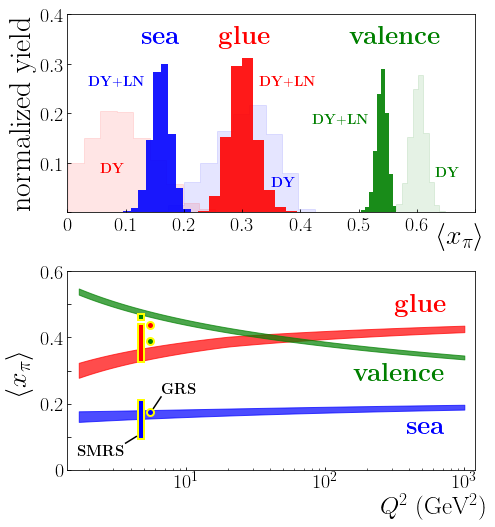

In [13]:
Q2=np.sort(data2['Q2'].keys())
msr={}
for _ in Q2:
    for flav in ['valence','sea','g']:
        if flav not in msr: 
            msr[flav]={'f':[],'df':[]}
        mc=data2['Q2'][_][flav]
        f=np.einsum('i,i',data2['weights'],mc)
        df=np.einsum('i,i',data2['weights'],(mc-f)**2)**0.5
        msr[flav]['f']=np.append(msr[flav]['f'],f)
        msr[flav]['df']=np.append(msr[flav]['df'],df)

nrows,ncols=2,1
fig = py.figure(figsize=(ncols*7,nrows*3.7))


########################################################################
ax=py.subplot(nrows,ncols,2)
ax.fill_between(Q2,msr['sea']['f']-msr['sea']['df'],msr['sea']['f']+msr['sea']['df'],color='b',alpha=0.7)
ax.fill_between(Q2,msr['g']['f']-msr['g']['df'],msr['g']['f']+msr['g']['df'],color='r',alpha=0.7)
ax.fill_between(Q2,msr['valence']['f']-msr['valence']['df'],msr['valence']['f']+msr['valence']['df'],color='g',alpha=0.7)
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.semilogx()
ax.set_xlim(1.4,1.2e3)
ax.set_xticks([10,100,1000])
ax.set_xticklabels([r'$10^1$',r'$10^2$',r'$10^3$'])
ax.set_xlabel(r'$Q^2~(\rm GeV^2)$',size=25)
ax.xaxis.set_label_coords(0.9,-0.12)
ax.set_ylim(0,0.6)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels([r'$0$',r'',r'$0.2$',r'',r'$0.4$',r'',r'$0.6$'])
ax.set_ylabel(r'$\left<x_\pi\right>$',size=28)
ax.text(0.83,0.18,r'$\bf sea$',size=26,color='b',transform=ax.transAxes)
ax.text(0.80,0.80,r'$\bf glue$',size=26,color='r',transform=ax.transAxes)
ax.text(0.70,0.45,r'$\bf valence$',size=26,color='g',transform=ax.transAxes)

# GRS (v,s,g)
ax.errorbar(5.5, 0.388, fmt='go', mfc='g', mec='yellow', mew=2, markersize=7)
ax.errorbar(5.5, 0.173, fmt='bo', mfc='b', mec='yellow', mew=2, markersize=7)
ax.errorbar(5.5, 0.439, fmt='ro', mfc='r', mec='yellow', mew=2, markersize=7)
ax.text(6.6, 0.23, r'$\bf GRS$', rotation=0, size=15, color='k')
ax.plot((5.5, 6.6), (0.17, 0.22), 'k-')

# SMRS (v,s,g)
ax.errorbar(4.7, 0.462, fmt='gs', mfc='g', mec='yellow', mew=2, markersize=6) # 10% s
ax.errorbar(4.7, 0.462, fmt='gs', mfc='g', mec='yellow', mew=2, markersize=6) # 20% s
ax.plot([4.7,4.7],[0.103,0.201], ls='-', lw=8, color='yellow')
ax.plot([4.7,4.7],[0.103,0.201], ls='-', lw=4, color='b')
ax.plot([4.7,4.7],[0.336,0.432], ls='-', lw=8, color='yellow')
ax.plot([4.7,4.7],[0.336,0.432], ls='-', lw=4, color='r')
ax.text(1.65, 0.043, r'$\bf SMRS$', rotation=0, size=15, color='k')
ax.plot((3.67, 4.38), (0.08, 0.10), 'k-')


########################################################################
ax=py.subplot(nrows,ncols,1)
Q2=1.3**2

ax.hist(data1['Q2'][Q2]['sea'],histtype='stepfilled',weights=data1['weights'],facecolor='b',edgecolor='b',alpha=0.1)
ax.hist(data1['Q2'][Q2]['g'],histtype='stepfilled',weights=data1['weights'],facecolor='r',edgecolor='r',alpha=0.1)
ax.hist(data1['Q2'][Q2]['valence'],histtype='stepfilled',weights=data1['weights'],facecolor='g',edgecolor='g',alpha=0.1)

ax.hist(data2['Q2'][Q2]['sea'],weights=data2['weights'],histtype='stepfilled',color='b',alpha=0.9)
ax.hist(data2['Q2'][Q2]['valence'],weights=data2['weights'],histtype='stepfilled',color='g',alpha=0.9)
ax.hist(data2['Q2'][Q2]['g'],weights=data2['weights'],histtype='stepfilled',color='r',alpha=0.9);

ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0,None)
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.set_xticklabels([r'$0$',r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$',r'$0.5$',r'$0.6$',r''])
ax.set_xlabel(r'$\left<x_\pi\right>$',size=28)
ax.xaxis.set_label_coords(0.97,-0.07)
ax.set_ylim(0,0.4)
ax.set_yticks([0,0.1,0.2,0.3,0.4])
ax.set_yticklabels([r'',r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$'])
ax.set_ylabel(r'$\rm normalized\ yield$',size=30)
ax.text(0.18,0.85,r'$\bf sea$',size=26,color='b',transform=ax.transAxes)
ax.text(0.50,0.13,r'$\bf DY$',size=14,color='b',transform=ax.transAxes)
ax.text(0.05,0.64,r'$\bf DY$'+r'$\bf +$'+r'$\bf LN$',size=14,color='b',transform=ax.transAxes)
ax.text(0.37,0.85,r'$\bf glue$',size=26,color='r',transform=ax.transAxes)
ax.text(0.08,0.20,r'$\bf DY$',size=14,color='r',transform=ax.transAxes)
ax.text(0.47,0.64,r'$\bf DY$'+r'$\bf +$'+r'$\bf LN$',size=14,color='r',transform=ax.transAxes)
ax.text(0.69,0.85,r'$\bf valence$',size=26,color='g',transform=ax.transAxes)
ax.text(0.90,0.18,r'$\bf DY$',size=14,color='g',transform=ax.transAxes)
ax.text(0.60,0.45,r'$\bf DY$'+r'$\bf +$'+r'$\bf LN$',size=14,color='g',transform=ax.transAxes)

py.tight_layout()
py.savefig('msr.png')

In [16]:
# full DY+LN fit
print 'Q2=',np.sort(data2['Q2'].keys())[0]
for flav in ['valence','sea','g']:
    print '%10s = %10.3f +/- %10.3f'%(flav,msr[flav]['f'][0],msr[flav]['df'][0])

Q2= 1.6900000000000002
   valence =      0.539 +/-      0.009
       sea =      0.160 +/-      0.016
         g =      0.301 +/-      0.023


In [17]:
# DY only fit
Q2=np.sort(data1['Q2'].keys())
msr={}
for _ in Q2:
    for flav in ['valence','sea','g']:
        if flav not in msr: 
            msr[flav]={'f':[],'df':[]}
        mc=data1['Q2'][_][flav]
        f=np.einsum('i,i',data1['weights'],mc)
        df=np.einsum('i,i',data1['weights'],(mc-f)**2)**0.5
        msr[flav]['f']=np.append(msr[flav]['f'],f)
        msr[flav]['df']=np.append(msr[flav]['df'],df)
print 'Q2=',np.sort(data1['Q2'].keys())[0]
for flav in ['valence','sea','g']:
    print '%10s = %10.3f +/- %10.3f'%(flav,msr[flav]['f'][0],msr[flav]['df'][0])

Q2= 1.6900000000000002
   valence =      0.602 +/-      0.013
       sea =      0.303 +/-      0.048
         g =      0.095 +/-      0.051


In [18]:
# 
names=[]
names.append('no-hera')
names.append('cov-mon')
names.append('cov-exp')
names.append('bishari')
names.append('imf-exp')
names.append('kT2-cutoff')
names.append('pv')
names.append('regge')

for name in names:
    print name
    data1=load('data/%s/calc/%s'%(name,'msr.dat'))

    Q2=np.sort(data1['Q2'].keys())
    msr={}
    for _ in Q2:
        for flav in ['valence','sea','g']:
            if flav not in msr: 
                msr[flav]={'f':[],'df':[]}
            mc=data1['Q2'][_][flav]
            f=np.einsum('i,i',data1['weights'],mc)
            df=np.einsum('i,i',data1['weights'],(mc-f)**2)**0.5
            msr[flav]['f']=np.append(msr[flav]['f'],f)
            msr[flav]['df']=np.append(msr[flav]['df'],df)
    print 'Q2=',np.sort(data1['Q2'].keys())[0]
    for flav in ['valence','sea','g']:
        print '%10s = %10.3f +/- %10.3f'%(flav,msr[flav]['f'][0],msr[flav]['df'][0])

no-hera
Q2= 1.6900000000000002
   valence =      0.602 +/-      0.013
       sea =      0.303 +/-      0.048
         g =      0.095 +/-      0.051
cov-mon
Q2= 1.6900000000000002
   valence =      0.532 +/-      0.009
       sea =      0.096 +/-      0.010
         g =      0.324 +/-      0.021
cov-exp
Q2= 1.6900000000000002
   valence =      0.528 +/-      0.009
       sea =      0.089 +/-      0.011
         g =      0.339 +/-      0.022
bishari
Q2= 1.6900000000000002
   valence =      0.481 +/-      0.012
       sea =      0.029 +/-      0.009
         g =      0.475 +/-      0.021
imf-exp
Q2= 1.6900000000000002
   valence =      0.539 +/-      0.009
       sea =      0.160 +/-      0.016
         g =      0.301 +/-      0.023
kT2-cutoff
Q2= 1.6900000000000002
   valence =      0.459 +/-      0.012
       sea =      0.012 +/-      0.004
         g =      0.523 +/-      0.014
pv
Q2= 1.6900000000000002
   valence =      0.532 +/-      0.009
       sea =      0.097 +/-      0.011
     

In [19]:
# <x_pi> at Q2 ~ 5 GeV^2
names=[]
names.append('imf-exp')

for name in names:
   print name
   data1=load('data/%s/calc/%s'%(name,'msr.dat'))

   Q2=np.sort(data1['Q2'].keys())
   #print Q2
   msr={}
   for _ in Q2:
       for flav in ['valence','sea','g']:
           if flav not in msr:
               msr[flav]={'f':[],'df':[]}
           mc=data1['Q2'][_][flav]
           f=np.einsum('i,i',data1['weights'],mc)
           df=np.einsum('i,i',data1['weights'],(mc-f)**2)**0.5
           msr[flav]['f']=np.append(msr[flav]['f'],f)
           msr[flav]['df']=np.append(msr[flav]['df'],df)
           
   i=17
   print 'Q2=',np.sort(data1['Q2'].keys())[i]
   for flav in ['valence','sea','g']:
       print '%10s = %10.3f +/- %10.3f'%(flav,msr[flav]['f'][i],msr[flav]['df'][i])

imf-exp
Q2= 5.057153772308279
   valence =      0.475 +/-      0.008
       sea =      0.167 +/-      0.013
         g =      0.350 +/-      0.018
